<a href="https://colab.research.google.com/github/jagrutimohanty/PredictionofShoppersNextStage/blob/main/ShoppersNextStagePredictionXGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Shoper Next Stage Prediction Model 

Project Guided By : Professor Chandrasekar Vuppalati

Team : Aggregators
Team Members : Jagruti Mohanty 
                Stuti Agarwal 
                Praveen Kumar 


This is the main notebook which runs the ML code, several redundant preprocessing were carried on in Chunktwo256 ,Chunkthree256 and Chunkfour256 , those output was stored in google drive as csv and is imported into this notebook for processing large amount of data


Step to mount the gdrive data

Step to mount the gdrive data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Step to read the csv file which has a preprocessing step included to eleminate the records with nan values for category code since this feature contributes to developing two new features category code level 1 and level 2 in the upcoming steps 

In [ ]:
import pandas as pd
#initially I have taken only 2000 records for my analysis not the full set of data 
df_nov =pd.read_csv("/content/gdrive/Shareddrives/256/Nov_data_without_categorycode_nan.csv",nrows=3500000,sep=',',engine='python')
df_oct =pd.read_csv("/content/gdrive/Shareddrives/256/Oct_data_without_categorycode_nan.csv",nrows=4500000,sep=',',engine='python')
df_chunks1 = pd.read_csv("/content/gdrive/Shareddrives/256/research papers/df_chucktwo.csv",sep=',',engine='python')
df_chunks2 = pd.read_csv("/content/gdrive/Shareddrives/256/research papers/df_chuckthree.csv",sep=',',engine='python')
df_chunks3 = pd.read_csv("/content/gdrive/Shareddrives/256/research papers/df_chuckfour.csv",nrows=4500000,sep=',',engine='python')
#df_chunk = pd.concat([df_chunks1 ,df_chunks2 ,df_chunks3])
df = pd.concat([df_oct, df_nov])
#df_new = df.sample(2000000)
df_new = df
df_test= df_new

Saving a copy of the dataframe 

In [ ]:
df_test= df_new

In [ ]:
import numpy as np
import datetime

import matplotlib.pyplot as plt

import matplotlib.dates as dates
from datetime import datetime

%matplotlib inline


This is to view the event type data i.e with purchase, view and cart activities which shows us that roughly the event logs information that has been split with maximum view activities , and a portion of in cart and purchase activities

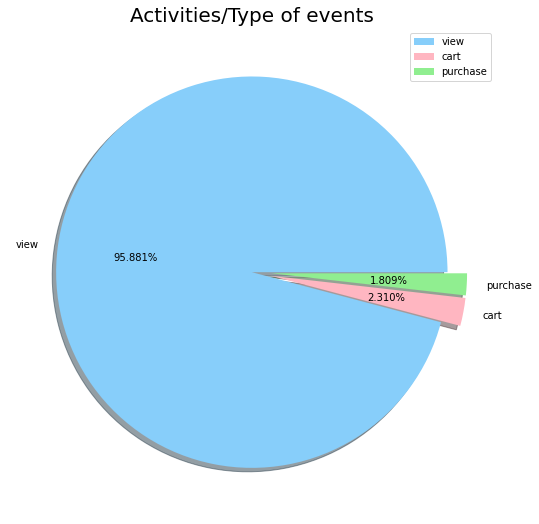

In [ ]:
lab = ['view', 'cart','purchase']
size = df_new['event_type'].value_counts()
colors = ['lightskyblue', 'lightpink','lightgreen']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = lab, shadow = True, autopct = '%.3f%%')
plt.title('Activities/Type of events', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

This is to plot the brands in overall data which are most active with events view , add to cart and purchase

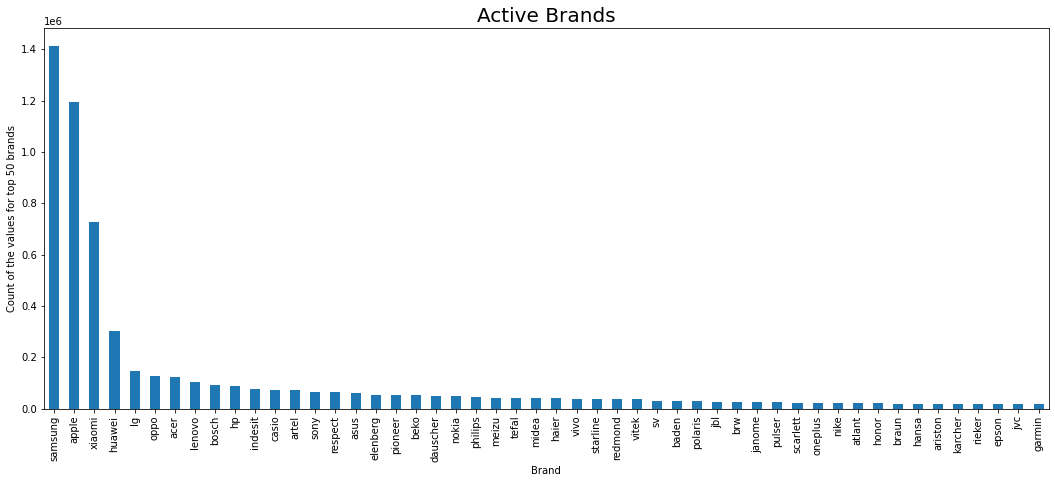

In [ ]:
df_new['brand'].value_counts().head(50).plot.bar(figsize = (18, 7))
plt.title('Active Brands', fontsize = 20)
plt.xlabel('Brand')
plt.ylabel('Count of the values for top 50 brands')
plt.show()

This is to plot the Categories which are most active with events view , add to cart and purchase

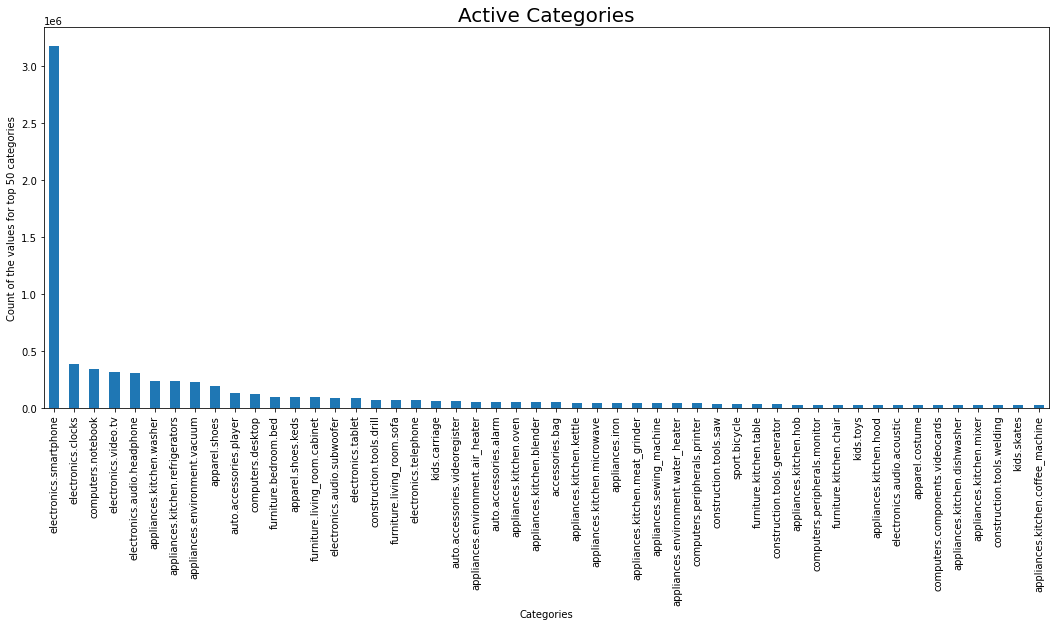

In [ ]:
df_new['category_code'].value_counts().head(50).plot.bar(figsize = (18, 7))
plt.title('Active Categories', fontsize = 20)
plt.xlabel('Categories')
plt.ylabel('Count of the values for top 50 categories')
plt.show()

In [ ]:
users = df_new['user_id'].nunique()
print ("Number of users visited the site: {}".format(users))

Number of users visited the site: 997146


The above step is to check the unique users who visited the site for the data present

In [ ]:
df_c = df_test[['product_id','category_id','brand' ,'category_code']]
df_sorted = df_c.sort_values(by=['product_id'], ascending=False)
df_sorted

,product_id,category_id,brand,category_code
2690002,60500012,2162513070503494350,NaN,construction.tools.welding
1952634,60500012,2162513070503494350,NaN,construction.tools.welding
1947696,60500012,2162513070503494350,NaN,construction.tools.welding
2690157,60500012,2162513070503494350,NaN,construction.tools.welding
1953177,60500012,2162513070503494350,NaN,construction.tools.welding
...,...,...,...,...
163880,1000978,2053013555631882655,samsung,electronics.smartphone
60057,1000978,2053013555631882655,samsung,electronics.smartphone
363276,1000978,2053013555631882655,samsung,electronics.smartphone
589919,1000978,2053013555631882655,samsung,electronics.smartphone


In [ ]:
df_brand_present = df_sorted.loc[df_sorted["brand"].notna()].drop_duplicates(subset=['product_id'])
df_brand_not_present = df_sorted.loc[df_sorted["brand"].isna() ].drop_duplicates(subset=['product_id'])

In [ ]:
df_brand_not_present

,product_id,category_id,brand,category_code
2690002,60500012,2162513070503494350,NaN,construction.tools.welding
1947373,60500011,2162513070503494350,NaN,construction.tools.welding
1947129,60500009,2162513070503494350,NaN,construction.tools.welding
1949008,60500008,2162513070503494350,NaN,construction.tools.welding
1991345,56600002,2150829948548416122,NaN,construction.tools.soldering
...,...,...,...,...
1643859,1003153,2053013555631882655,NaN,electronics.smartphone
4361008,1002923,2053013555631882655,NaN,electronics.smartphone
3503818,1002876,2053013555631882655,NaN,electronics.smartphone
121233,1002796,2053013555631882655,NaN,electronics.smartphone


This shows that the missing values for brand columns that is planned to be filled based on the product ids that had brand values tagged to them

In [ ]:
df_brand_not_present.loc[df_brand_not_present.product_id.isin(df_brand_present.product_id)]

,product_id,category_id,brand,category_code
663896,56300174,2166064855264526831,NaN,apparel.jumper
445271,56300168,2166064855264526831,NaN,apparel.jumper
48751,56300164,2166064855264526831,NaN,apparel.jumper
96980,56300157,2166064855264526831,NaN,apparel.jumper
158917,56300125,2166064855264526831,NaN,apparel.jumper
...,...,...,...,...
1643859,1003153,2053013555631882655,NaN,electronics.smartphone
4361008,1002923,2053013555631882655,NaN,electronics.smartphone
3503818,1002876,2053013555631882655,NaN,electronics.smartphone
121233,1002796,2053013555631882655,NaN,electronics.smartphone


This left join is to fill in the missing values for the brand columns. Another alternative approach way which was thought of later on was to remove the duplicates based on product id with brand null and merge it back into the main dataframe

In [ ]:
df_brand_not_present = df_brand_not_present.merge(df_brand_present,on='product_id',how="left")
df_brand_not_present.head(20)

,product_id,category_id_x,brand_x,category_code_x,category_id_y,brand_y,category_code_y
0,60500012,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,NaN
1,60500011,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,NaN
2,60500009,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,NaN
3,60500008,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,NaN
4,56600002,2150829948548416122,NaN,construction.tools.soldering,NaN,NaN,NaN
5,56300174,2166064855264526831,NaN,apparel.jumper,2.166065e+18,conceptclub,apparel.jumper
6,56300168,2166064855264526831,NaN,apparel.jumper,2.166065e+18,conceptclub,apparel.jumper
7,56300164,2166064855264526831,NaN,apparel.jumper,2.166065e+18,conceptclub,apparel.jumper
8,56300157,2166064855264526831,NaN,apparel.jumper,2.166065e+18,conceptclub,apparel.jumper
9,56300125,2166064855264526831,NaN,apparel.jumper,2.166065e+18,conceptclub,apparel.jumper


In [ ]:
df_brand_not_present['category_code_y'] = df_brand_not_present['category_code_y'].fillna(df_brand_not_present['category_code_x'])

df_brand_not_present['brand_y'] = df_brand_not_present['brand_y'].fillna(df_brand_not_present['brand_x'])

Step to merge the columns

In [ ]:
df_brand_not_present

,product_id,category_id_x,brand_x,category_code_x,category_id_y,brand_y,category_code_y
0,60500012,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,construction.tools.welding
1,60500011,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,construction.tools.welding
2,60500009,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,construction.tools.welding
3,60500008,2162513070503494350,NaN,construction.tools.welding,NaN,NaN,construction.tools.welding
4,56600002,2150829948548416122,NaN,construction.tools.soldering,NaN,NaN,construction.tools.soldering
...,...,...,...,...,...,...,...
12320,1003153,2053013555631882655,NaN,electronics.smartphone,2.053014e+18,huawei,electronics.smartphone
12321,1002923,2053013555631882655,NaN,electronics.smartphone,2.053014e+18,huawei,electronics.smartphone
12322,1002876,2053013555631882655,NaN,electronics.smartphone,2.053014e+18,samsung,electronics.smartphone
12323,1002796,2053013555631882655,NaN,electronics.smartphone,2.053014e+18,apple,electronics.smartphone


In [ ]:
df_brand_not_present = df_brand_not_present.drop(['category_id_y' , 'category_code_x' , 'brand_x'], axis=1)

This is to transform the data to bring it back to the original column names after the join

In [ ]:
df_brand_not_present.columns

Index(['product_id', 'category_id_x', 'brand_y', 'category_code_y'], dtype='object')

In [ ]:
df_brand_not_present =  df_brand_not_present.rename(columns={"category_id_x": "category_id" ,"category_code_y": "category_code", "brand_y": "brand"})

In [ ]:
df_brand_not_present

,product_id,category_id,brand,category_code
0,60500012,2162513070503494350,NaN,construction.tools.welding
1,60500011,2162513070503494350,NaN,construction.tools.welding
2,60500009,2162513070503494350,NaN,construction.tools.welding
3,60500008,2162513070503494350,NaN,construction.tools.welding
4,56600002,2150829948548416122,NaN,construction.tools.soldering
...,...,...,...,...
12320,1003153,2053013555631882655,huawei,electronics.smartphone
12321,1002923,2053013555631882655,huawei,electronics.smartphone
12322,1002876,2053013555631882655,samsung,electronics.smartphone
12323,1002796,2053013555631882655,apple,electronics.smartphone


In [ ]:
df_brand_not_present.loc[df_brand_not_present["brand"].isna()]
df_brand_present.loc[df_brand_present["brand"].notna()]

,product_id,category_id,brand,category_code
2737990,60500010,2162513070503494350,stavr,construction.tools.welding
3222096,60500007,2162513070503494350,denzel,construction.tools.welding
1285113,60500006,2162513070503494350,solaris,construction.tools.welding
3481136,60500004,2162513070503494350,kolner,construction.tools.welding
835797,60500003,2162513070503494350,enkor,construction.tools.welding
...,...,...,...,...
3084467,1002062,2053013555631882655,samsung,electronics.smartphone
1338913,1002042,2053013555631882655,samsung,electronics.smartphone
3388441,1001606,2053013555631882655,apple,electronics.smartphone
4141863,1001588,2053013555631882655,meizu,electronics.smartphone


This is to check how many rows do not have brand tagged or how many rows have brand tagged 

In [ ]:
df_new = df_test
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
...,...,...,...,...,...,...,...,...,...,...
3499995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,appliances.environment.air_heater,elenberg,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76
3499996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,furniture.living_room.cabinet,NaN,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e
3499997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,electronics.clocks,huawei,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315
3499998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,electronics.smartphone,samsung,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371


Merging into the main dataframe after filling the missing values for product_id


In [ ]:
df_new = df_new.merge(df_brand_not_present,on='product_id',how="left")
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id_x,category_code_x,brand_x,price,user_id,user_session,category_id_y,brand_y,category_code_y
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,NaN,NaN,NaN
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2.053014e+18,NaN,furniture.living_room.sofa
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,NaN,NaN,NaN
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,NaN,NaN,NaN
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,appliances.environment.air_heater,elenberg,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76,NaN,NaN,NaN
7999996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,furniture.living_room.cabinet,NaN,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e,2.053014e+18,NaN,furniture.living_room.cabinet
7999997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,electronics.clocks,huawei,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315,NaN,NaN,NaN
7999998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,electronics.smartphone,samsung,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371,NaN,NaN,NaN


This step is to keep the columns same as before the merge was done

In [ ]:
df_new['category_code_y'] = df_new['category_code_y'].fillna(df_new['category_code_x'])
df_new['brand_y'] = df_new['brand_y'].fillna(df_new['brand_x'])
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id_x,category_code_x,brand_x,price,user_id,user_session,category_id_y,brand_y,category_code_y
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,NaN,aqua,appliances.environment.water_heater
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2.053014e+18,NaN,furniture.living_room.sofa
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,NaN,lenovo,computers.notebook
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,NaN,apple,electronics.smartphone
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,NaN,pulser,computers.desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,appliances.environment.air_heater,elenberg,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76,NaN,elenberg,appliances.environment.air_heater
7999996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,furniture.living_room.cabinet,NaN,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e,2.053014e+18,NaN,furniture.living_room.cabinet
7999997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,electronics.clocks,huawei,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315,NaN,huawei,electronics.clocks
7999998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,electronics.smartphone,samsung,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371,NaN,samsung,electronics.smartphone


In [ ]:
df_new = df_new.drop(['category_code_x' , 'brand_x' , 'category_id_y'], axis=1)

In [ ]:
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id_x,price,user_id,user_session,brand_y,category_code_y
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,aqua,appliances.environment.water_heater
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,NaN,furniture.living_room.sofa
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,lenovo,computers.notebook
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,apple,electronics.smartphone
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,pulser,computers.desktop
...,...,...,...,...,...,...,...,...,...,...
7999995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76,elenberg,appliances.environment.air_heater
7999996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e,NaN,furniture.living_room.cabinet
7999997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315,huawei,electronics.clocks
7999998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371,samsung,electronics.smartphone


In [ ]:
df_new['DateTime'] = df_new['event_time'].astype('datetime64[ns]')

This step takes longer time to process, creating a new datime feature which could be parsed for various operations on time date

In [ ]:
df_new

df_new =  df_new.rename(columns={"category_id_x": "category_id" ,"category_code_y": "category_code", "brand_y": "brand"})
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,aqua,appliances.environment.water_heater,2019-10-01 00:00:00
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,NaN,furniture.living_room.sofa,2019-10-01 00:00:01
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,lenovo,computers.notebook,2019-10-01 00:00:01
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,apple,electronics.smartphone,2019-10-01 00:00:04
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,pulser,computers.desktop,2019-10-01 00:00:05
...,...,...,...,...,...,...,...,...,...,...,...
7999995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76,elenberg,appliances.environment.air_heater,2019-11-04 09:11:33
7999996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e,NaN,furniture.living_room.cabinet,2019-11-04 09:11:33
7999997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315,huawei,electronics.clocks,2019-11-04 09:11:33
7999998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371,samsung,electronics.smartphone,2019-11-04 09:11:33


In [ ]:

df_new['Time'] = df_new['DateTime'].dt.time
df_new['Date'] = df_new['DateTime'].dt.date

Created new time and date features for EDA or data transformation

In [ ]:
df_new.sort_values(by=['user_session' , 'DateTime']).head(20)

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date
2028568,2960857,2019-10-03 11:28:52 UTC,view,2501061,2053013564003713919,195.42,512483064,000003eb-b63e-45d9-9f26-f229057c654a,darina,appliances.kitchen.oven,2019-10-03 11:28:52,11:28:52,2019-10-03
6083503,406183,2019-11-02 13:29:04 UTC,view,12300059,2053013556311359947,69.17,513196170,00000510-834a-498a-9bed-561a90c5125e,bosch,construction.tools.drill,2019-11-02 13:29:04,13:29:04,2019-11-02
5408428,373202,2019-11-01 19:06:53 UTC,view,1002544,2053013555631882655,458.25,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,apple,electronics.smartphone,2019-11-01 19:06:53,19:06:53,2019-11-01
5408627,373512,2019-11-01 19:07:11 UTC,view,1002544,2053013555631882655,458.25,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,apple,electronics.smartphone,2019-11-01 19:07:11,19:07:11,2019-11-01
5409309,374543,2019-11-01 19:08:13 UTC,view,1004659,2053013555631882655,716.76,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,samsung,electronics.smartphone,2019-11-01 19:08:13,19:08:13,2019-11-01
5410458,376305,2019-11-01 19:09:55 UTC,view,1004659,2053013555631882655,716.76,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,samsung,electronics.smartphone,2019-11-01 19:09:55,19:09:55,2019-11-01
5411404,377701,2019-11-01 19:11:13 UTC,view,1004659,2053013555631882655,716.76,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,samsung,electronics.smartphone,2019-11-01 19:11:13,19:11:13,2019-11-01
5412473,379353,2019-11-01 19:12:49 UTC,view,1005129,2053013555631882655,1329.44,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,apple,electronics.smartphone,2019-11-01 19:12:49,19:12:49,2019-11-01
5412782,379811,2019-11-01 19:13:17 UTC,view,1005129,2053013555631882655,1329.44,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,apple,electronics.smartphone,2019-11-01 19:13:17,19:13:17,2019-11-01
5413315,380631,2019-11-01 19:14:07 UTC,view,5100855,2053013553341792533,548.02,514001239,000009c4-a1dd-4764-87d9-24f3d7e43c4f,apple,electronics.clocks,2019-11-01 19:14:07,19:14:07,2019-11-01


This is to check for the same session how many activities are present for one given sample


In [ ]:
df_new

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date
0,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,aqua,appliances.environment.water_heater,2019-10-01 00:00:00,00:00:00,2019-10-01
1,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,NaN,furniture.living_room.sofa,2019-10-01 00:00:01,00:00:01,2019-10-01
2,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,lenovo,computers.notebook,2019-10-01 00:00:01,00:00:01,2019-10-01
3,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,apple,electronics.smartphone,2019-10-01 00:00:04,00:00:04,2019-10-01
4,5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,pulser,computers.desktop,2019-10-01 00:00:05,00:00:05,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,355494,2019-11-04 09:11:33 UTC,view,6200035,2053013552293216471,56.60,516741589,105f21b2-c01d-408b-ba77-3e14f93ddf76,elenberg,appliances.environment.air_heater,2019-11-04 09:11:33,09:11:33,2019-11-04
7999996,355498,2019-11-04 09:11:33 UTC,view,14701435,2053013557133443581,205.90,516514568,d9d5e533-eada-4d1d-8409-2e0bb089549e,NaN,furniture.living_room.cabinet,2019-11-04 09:11:33,09:11:33,2019-11-04
7999997,355502,2019-11-04 09:11:33 UTC,view,5100722,2053013553341792533,154.16,513208144,f14ec934-ef9d-43b0-bdee-f84b9b4ab315,huawei,electronics.clocks,2019-11-04 09:11:33,09:11:33,2019-11-04
7999998,355503,2019-11-04 09:11:33 UTC,view,1004653,2053013555631882655,588.56,548076552,347d64f6-c064-45c4-9746-7ce0cbdc3371,samsung,electronics.smartphone,2019-11-04 09:11:33,09:11:33,2019-11-04


In [ ]:

df_capu = df_new.loc[df_new["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_capu["is_purchased"] = np.where(df_capu["event_type"]=="purchase",1,0)
df_capu["is_purchased"] = df_capu.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_capu = df_capu.loc[df_capu["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_capu['dayofweek'] = df_capu['DateTime'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_capu.dropna(how='any', inplace=True)
df_capu["category_code_split1"] = df_capu["category_code"].str.split(".",expand=True)[0].astype('category')
df_capu["category_code_split2"] = df_capu["category_code"].str.split(".",expand=True)[1].astype('category')

## Creation of new features
based on category code - category_code_split1
                         category_code_split2
based on datetime - created day of week feature 
based on event type - created prediction label - is_purchased 0 - means item wont be purchased and for is_purchased 1 - means item will be purchased


In [ ]:
purchaseandcart = df_new.loc[df_new["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
purchaseandcart.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df_test.loc[df_test['user_id'].isin(purchaseandcart['user_id'])]

In [ ]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})


## Based on user session added all the activities in the session 
Which includes view, in cart and purchase from the original dataframe before the cart and purchase filter was applied

In [ ]:
df_capu = df_capu.merge(activity_in_session, on='user_session', how='left')
df_capu['activity_count'] = df_capu['activity_count'].fillna(0)
df_capu.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date,is_purchased,dayofweek,category_code_split1,category_code_split2,activity_count
0,583,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,apple,electronics.smartphone,2019-10-01 00:09:33,00:09:33,2019-10-01,1,1,electronics,smartphone,4.0
1,680,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,apple,electronics.audio.headphone,2019-10-01 00:11:00,00:11:00,2019-10-01,0,1,electronics,audio,4.0
2,1325,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,samsung,electronics.smartphone,2019-10-01 02:17:59,02:17:59,2019-10-01,0,1,electronics,smartphone,7.0
3,1654,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,huawei,electronics.smartphone,2019-10-01 02:19:36,02:19:36,2019-10-01,1,1,electronics,smartphone,16.0
4,1684,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,samsung,electronics.smartphone,2019-10-01 02:19:43,02:19:43,2019-10-01,1,1,electronics,smartphone,10.0


In [ ]:


df_capu['activity_count'] = df_capu['activity_count'].fillna(0)

In [ ]:
cart_purchase_users_all_activity_time_spend = df_new.loc[df_new['user_id'].isin(purchaseandcart['user_id'])]
activity_in_session_time_spent = cart_purchase_users_all_activity_time_spend.groupby(['user_session']).agg({'DateTime': [np.min, np.max]})
activity_in_session_time_spent = activity_in_session_time_spent.xs('DateTime', axis=1, drop_level=True).reset_index()
activity_in_session_time_spent 
activity_in_session_time_spent['amax'] = activity_in_session_time_spent['amax'].apply(lambda x: pd.Timestamp(x))
activity_in_session_time_spent['amin'] = activity_in_session_time_spent['amin'].apply(lambda x: pd.Timestamp(x))

activity_in_session_time_spent['Time_Spend'] = activity_in_session_time_spent['amax'] - activity_in_session_time_spent['amin']

In [ ]:

activity_in_session_time_spent

,user_session,amin,amax,Time_Spend
0,000003eb-b63e-45d9-9f26-f229057c654a,2019-10-03 11:28:52,2019-10-03 11:28:52,0 days 00:00:00
1,000011ef-e9fc-4920-96cd-2534bda3cdc2,2019-10-03 13:17:56,2019-10-03 13:28:12,0 days 00:10:16
2,000035b8-2419-485d-9958-ec2f3aa9e907,2019-10-04 08:12:02,2019-10-04 08:12:02,0 days 00:00:00
3,000065f6-fdfc-4bf6-b5dc-7b7730758b03,2019-10-03 11:10:05,2019-10-03 11:10:05,0 days 00:00:00
4,0000b961-55eb-4005-a8ae-326943f1ced3,2019-11-04 03:31:38,2019-11-04 03:33:13,0 days 00:01:35
...,...,...,...,...
380898,ffffa654-87e2-3a83-1a87-33c0480c3e36,2019-10-04 08:50:11,2019-10-04 08:56:31,0 days 00:06:20
380899,ffffaa7e-6a84-47e8-aa8a-693be5f66120,2019-10-04 02:05:18,2019-10-04 02:05:18,0 days 00:00:00
380900,ffffe054-ebc9-4e71-877e-6d220723d436,2019-11-02 10:58:30,2019-11-02 10:59:41,0 days 00:01:11
380901,ffffe9cb-abb5-4f6b-a5f5-2d49c12f4c22,2019-11-02 05:34:57,2019-11-02 05:35:41,0 days 00:00:44


#### Activity Timespend new feature is created
which is based on the time user session first activity was noted and time the user session last activity noted and this includes all the activites including view , cart and purchase 

In [ ]:
df_capu = df_capu.merge(activity_in_session_time_spent, on='user_session', how='left')


In [ ]:

df_capu.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date,is_purchased,dayofweek,category_code_split1,category_code_split2,activity_count,amin,amax,Time_Spend
0,583,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,apple,electronics.smartphone,2019-10-01 00:09:33,00:09:33,2019-10-01,1,1,electronics,smartphone,4.0,2019-10-01 00:08:50,2019-10-01 00:10:42,0 days 00:01:52
1,680,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,apple,electronics.audio.headphone,2019-10-01 00:11:00,00:11:00,2019-10-01,0,1,electronics,audio,4.0,2019-10-01 00:10:22,2019-10-01 00:12:49,0 days 00:02:27
2,1325,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,samsung,electronics.smartphone,2019-10-01 02:17:59,02:17:59,2019-10-01,0,1,electronics,smartphone,7.0,2019-10-01 02:17:36,2019-10-01 02:29:58,0 days 00:12:22
3,1654,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,huawei,electronics.smartphone,2019-10-01 02:19:36,02:19:36,2019-10-01,1,1,electronics,smartphone,16.0,2019-10-01 02:19:06,2019-10-01 02:33:09,0 days 00:14:03
4,1684,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291,samsung,electronics.smartphone,2019-10-01 02:19:43,02:19:43,2019-10-01,1,1,electronics,smartphone,10.0,2019-10-01 02:18:57,2019-10-01 02:27:02,0 days 00:08:05


In [ ]:
df_chunk_test = pd.concat([df_chunks1 ,df_chunks2 ,df_chunks3])
df_chunk_test.shape


df_chunk_test = df_chunk_test.rename(columns={"Unnamed: 0": "temp" })

df_chunk_test = df_chunk_test.rename(columns={"Unnamed: 0.1": "Unnamed: 0" })
df_chunk_test = df_chunk_test.drop(['temp'], axis=1)

#df_chunk_test.info()
df_chunk_test['DateTime'] = df_chunk_test['DateTime'].astype('datetime64[ns]')
df_chunk_test['amin'] = df_chunk_test['amin'].astype('datetime64[ns]')
df_chunk_test['amax'] = df_chunk_test['amax'].astype('datetime64[ns]')
#df_chunk_test['Time_Spend'] = df_chunk_test['Time_Spend'].astype('str')
#df_chunk_test['Time_Spend'] = df_chunk_test['Time_Spend'].astype('timedelta64[ns]')
df_chunk_test['Time_Spend'] =  pd.to_timedelta(df_chunk_test['Time_Spend'])
df_chunk_test['category_code_split1'] =   df_chunk_test['category_code_split1'].astype('category')
df_chunk_test['category_code_split2'] =  df_chunk_test['category_code_split2'].astype('category')
df_chunk_test['is_purchased'] =  df_chunk_test['is_purchased'].astype('int64')
df_chunk_test['dayofweek'] =  df_chunk_test['dayofweek'].astype('str')
df_chunk_test.info()
df_chunk_z = df_capu
df_capu = df_chunk_z
df_capu = df_capu.append(df_chunk_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187890 entries, 0 to 72495
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Unnamed: 0            187890 non-null  int64          
 1   event_time            187890 non-null  object         
 2   event_type            187890 non-null  object         
 3   product_id            187890 non-null  int64          
 4   category_id           187890 non-null  int64          
 5   price                 187890 non-null  float64        
 6   user_id               187890 non-null  int64          
 7   user_session          187890 non-null  object         
 8   brand                 187890 non-null  object         
 9   category_code         187890 non-null  object         
 10  DateTime              187890 non-null  datetime64[ns] 
 11  Time                  187890 non-null  object         
 12  Date                  187890 non-null  object

#### Since the data was huge it was hard to process all of it in one run , hence created separate notebooks for data intervals and ran the common preprocessing step , saved the dataframes into csv in the drive location path , picked it in the main notebook and combined it. Faced issue with dtypes hence added steps as shown above


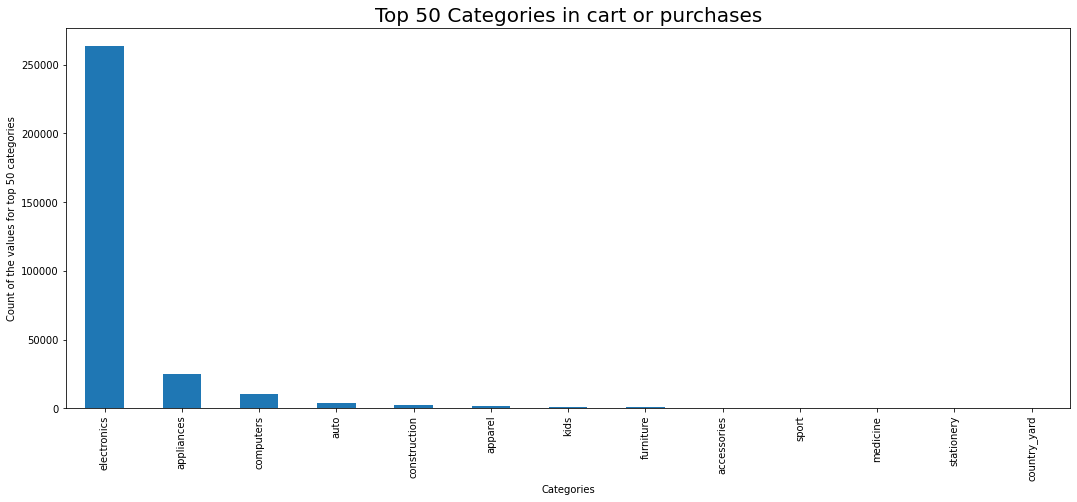

In [ ]:
df_capu['category_code_split1'].value_counts().head(50).plot.bar(figsize = (18, 7))
plt.title('Top 50 Categories in cart or purchases', fontsize = 20)
plt.xlabel('Categories')
plt.ylabel('Count of the values for top 50 categories')
plt.show()

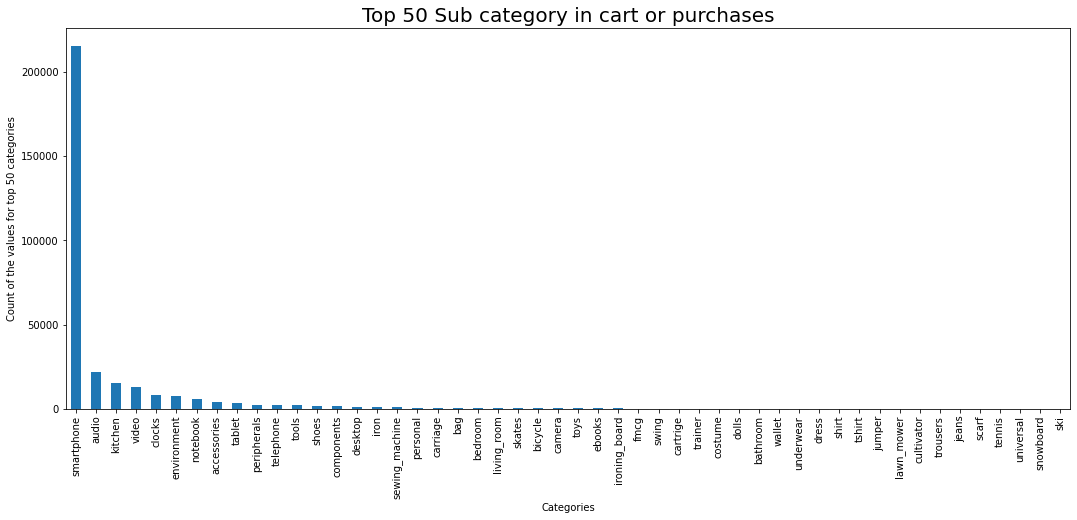

In [ ]:
df_capu['category_code_split2'].value_counts().head(50).plot.bar(figsize = (18, 7))
plt.title('Top 50 Sub category in cart or purchases', fontsize = 20)
plt.xlabel('Categories')
plt.ylabel('Count of the values for top 50 categories')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

In [ ]:
df_capu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309863 entries, 0 to 72495
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Unnamed: 0            309863 non-null  int64          
 1   event_time            309863 non-null  object         
 2   event_type            309863 non-null  object         
 3   product_id            309863 non-null  int64          
 4   category_id           309863 non-null  int64          
 5   price                 309863 non-null  float64        
 6   user_id               309863 non-null  int64          
 7   user_session          309863 non-null  object         
 8   brand                 309863 non-null  object         
 9   category_code         309863 non-null  object         
 10  DateTime              309863 non-null  datetime64[ns] 
 11  Time                  309863 non-null  object         
 12  Date                  309863 non-null  object

In [ ]:
df_chunk_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187890 entries, 0 to 72495
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Unnamed: 0            187890 non-null  int64          
 1   event_time            187890 non-null  object         
 2   event_type            187890 non-null  object         
 3   product_id            187890 non-null  int64          
 4   category_id           187890 non-null  int64          
 5   price                 187890 non-null  float64        
 6   user_id               187890 non-null  int64          
 7   user_session          187890 non-null  object         
 8   brand                 187890 non-null  object         
 9   category_code         187890 non-null  object         
 10  DateTime              187890 non-null  datetime64[ns] 
 11  Time                  187890 non-null  object         
 12  Date                  187890 non-null  object

This is to show the total amount of time spend by the users whose items are present in cart or they made a purchase , this helps us to find daily hourly pattern of timeseries and in which hours usually the traffic is high for highly interested users, by changing the value [0:12] we can do the analysis for day wise by [0:10] or show even more granular data with [0:16]


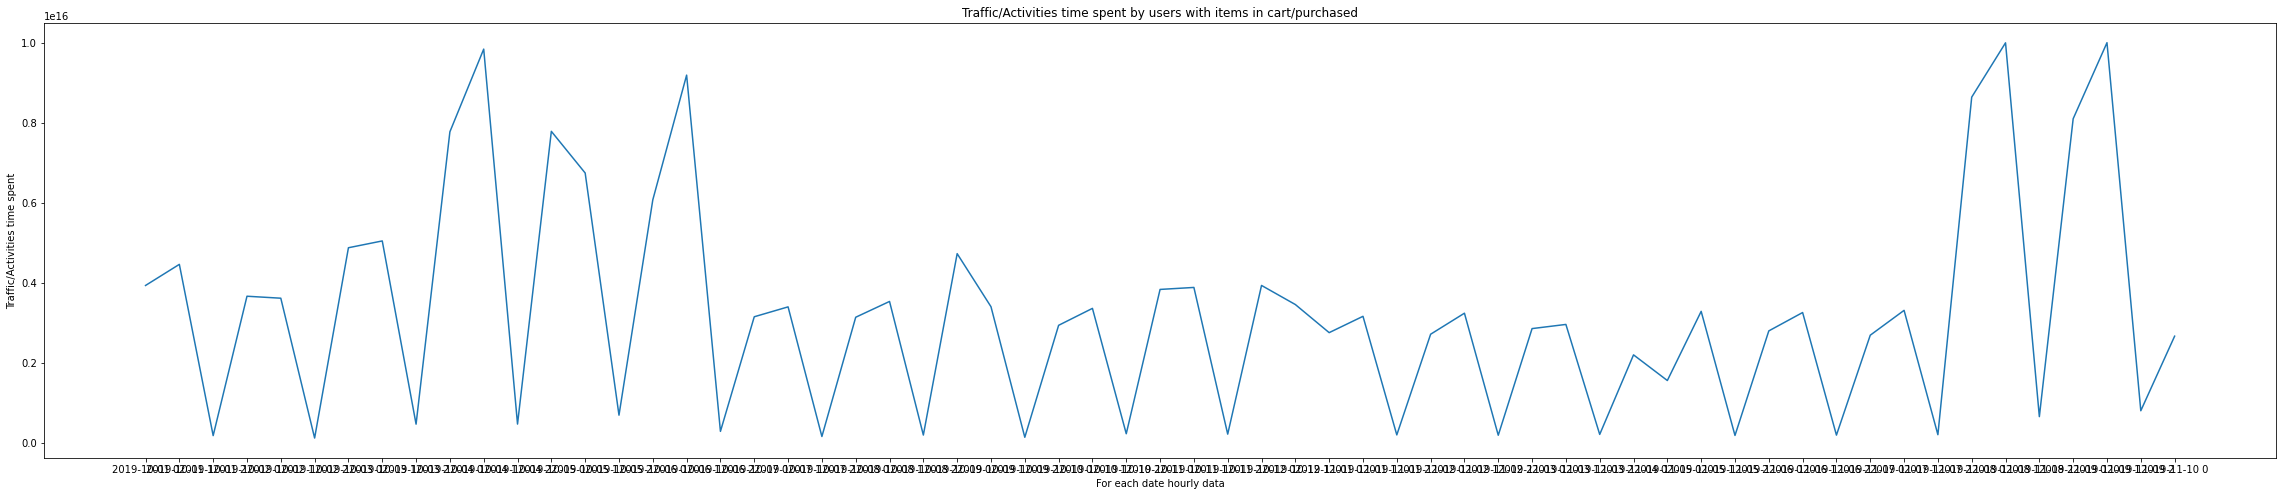

In [ ]:
from datetime import datetime

d = df_capu.loc[:,['DateTime','Time_Spend']]
d['DateTime'] = d['DateTime'].apply(lambda s: str(s)[0:12])
timespent_by_date = d.groupby(['DateTime'])['Time_Spend'].sum().reset_index()
timespent_by_date.columns

x = timespent_by_date['DateTime']
y = timespent_by_date['Time_Spend']
plt.rcParams['figure.figsize'] = (40,8)
plt.xlabel('For each date hourly data')
plt.ylabel('Traffic/Activities time spent')
plt.title('Traffic/Activities time spent by users with items in cart/purchased')

plt.plot(x,y)
plt.show()

The above plot is to show the traffic or activities time spent on an hourly timeseries.There seems to be a spike on 2019-10-01 at particular window periods  

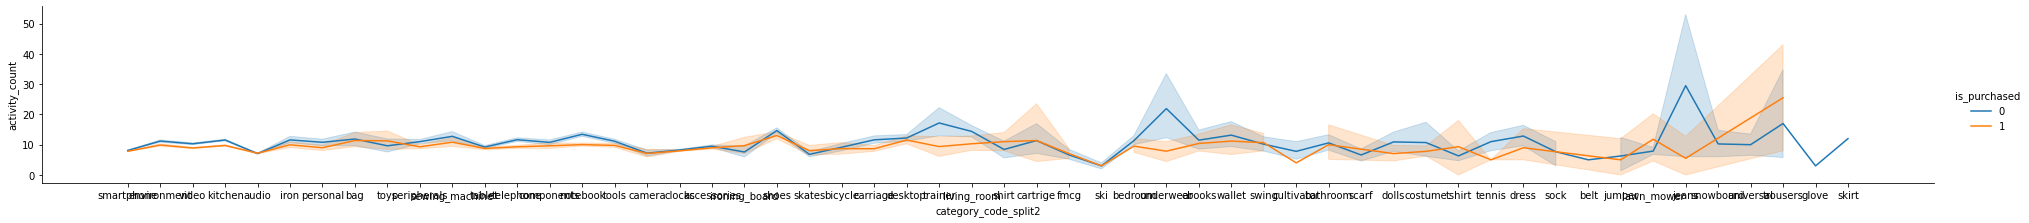

In [ ]:
import seaborn as sns
#sns.boxplot(x="category_code_level1", y="activity_count", data=df_targets)


df_sortc = df_capu.sort_values(by=[ 'Time_Spend'])
sns.relplot(x= "category_code_split2", y="activity_count", hue="is_purchased", kind="line",height=3, aspect=9, data=df_sortc)


There are few categories for which the amount of timespend and activity counts are high such as in case if bedroom ,personal items, iron but not so significant purchases happened , where as for few categories such as kitchen items smartphones the likelihood of purchase and added to cart is almost similar. These insights help buisness to understand user purchase behavior

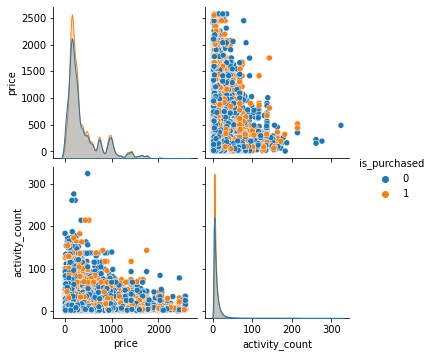

In [ ]:


df_pair = df_capu[['is_purchased','price' ,'activity_count' ]]


sns.pairplot(df_pair, hue = 'is_purchased')

This is to analyze the purchased and added to cart behavior with respect to price and activy count , there has been more sales interms of purchases as compared to items present in cart , which is a positive sign for the business

[Text(0, 0.5, 'Categories'), Text(0.5, 0, 'Activities')]

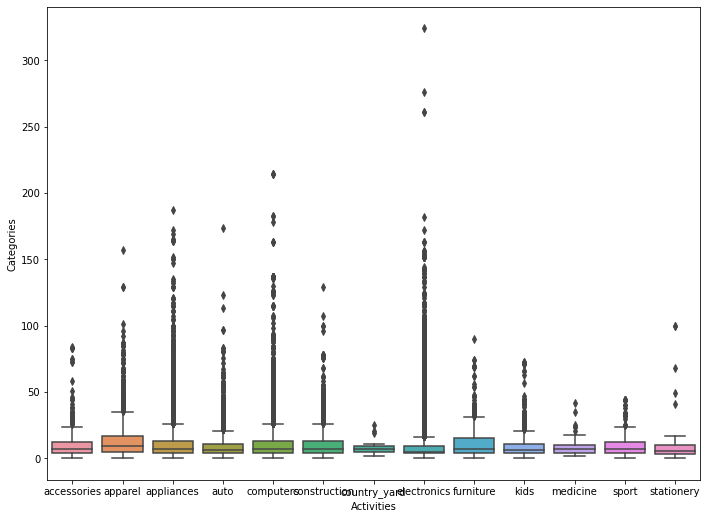

In [ ]:
dims = (11.7, 8.7)
fig, ax = plt.subplots(figsize=dims)
bx = sns.boxplot(x="category_code_split1", y="activity_count", data=df_capu)
bx.set(xlabel='Activities',ylabel='Categories')

In [ ]:
is_purcahase_dataset = df_capu[df_capu['is_purchased']== 1]
n_samples_x = int(len((is_purcahase_dataset.index)))
is_purcahase_dataset.shape[0]

160416

In [ ]:
not_purcahase_dataset = df_capu[df_capu['is_purchased']== 0]
n_samples_y = len((not_purcahase_dataset.index))
not_purcahase_dataset.shape[0]

149447

In [ ]:



is_purchase_downsampled = resample(is_purcahase_dataset,
                                replace = False, 
                                n_samples = n_samples_x ,
                                random_state = 27)
not_purcahase_set_downsampled = resample(not_purcahase_dataset,
                                replace = False,
                                n_samples = n_samples_y,
                                random_state = 27)

In [ ]:
downsampled = pd.concat([is_purchase_downsampled, not_purcahase_set_downsampled])
downsampled['is_purchased'].value_counts()

1    160416
0    149447
Name: is_purchased, dtype: int64

In [ ]:
downsampled.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'price', 'user_id', 'user_session', 'brand', 'category_code',
       'DateTime', 'Time', 'Date', 'is_purchased', 'dayofweek',
       'category_code_split1', 'category_code_split2', 'activity_count',
       'amin', 'amax', 'Time_Spend'],
      dtype='object')

In [ ]:
features = downsampled[['brand', 'price', 'dayofweek' , 'category_code_split1', 'category_code_split2','activity_count','Time_Spend']]

In [ ]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'dayofweek'] = LabelEncoder().fit_transform(downsampled.loc[:,'dayofweek'].copy())
features.loc[:,'category_code_split1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_split1'].copy())
features.loc[:,'category_code_split2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_split2'].copy())
features.loc[:,'Time_Spend'] = LabelEncoder().fit_transform(downsampled.loc[:,'Time_Spend'].copy())
is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,brand,price,dayofweek,category_code_split1,category_code_split2,activity_count,Time_Spend
29275,816,192.77,1,7,38,3.0,128
119308,652,241.86,0,7,38,4.0,70
53528,56,295.51,2,7,1,5.0,215
38965,652,359.76,4,7,38,3.0,249
55229,652,234.23,4,7,42,3.0,311


Label Encoded the data to convert non numerical data to numerical format for analysis

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

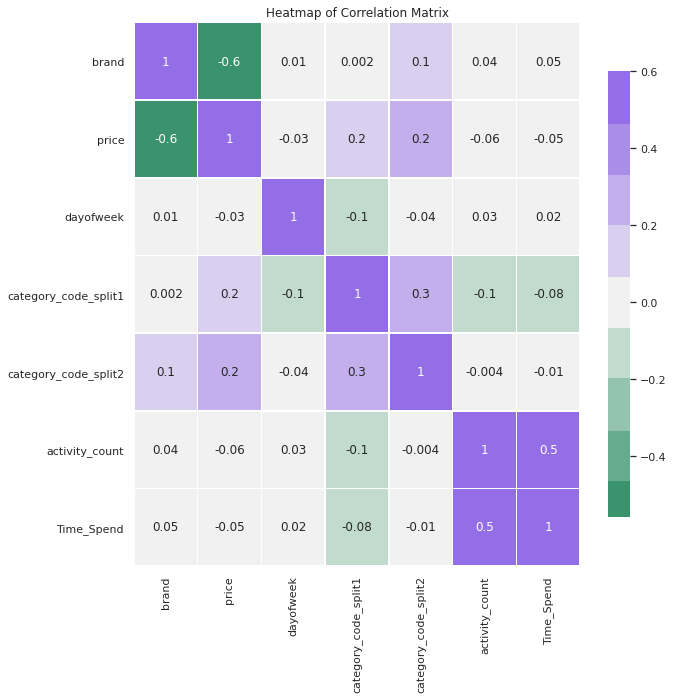

In [ ]:
# Heatmap

import seaborn as sns; sns.set_theme()

cmaps = sns.diverging_palette(150, 275, s=80, l=55, n=9)

corr = features.corr()
corr
plt.figure(figsize = (10,10))

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,fmt='.1g', cmap = cmaps, vmax=.6, center=0, square=False, linewidths=.5, cbar_kws={"shrink": .82} ,annot = True)
plt.title('Heatmap of Correlation Matrix')

Correlation Matrix - 
Timespend is positively correlated with activity count ,brand and negatively correlated to the category codes , i.e if there are more number of categories that the user checks , then the relative time spend on each category decreases similarly the other features are correlated as shown in the heatmap diagram
  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    is_purchased, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.6405854162296484
Precision: 0.6263458046697185
Recall: 0.7616855854454984
fbeta: 0.6385602266959743


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.5988414309457344
Precision: 0.6041404911479155
Recall: 0.6579692116311615
fbeta: 0.59756341287849


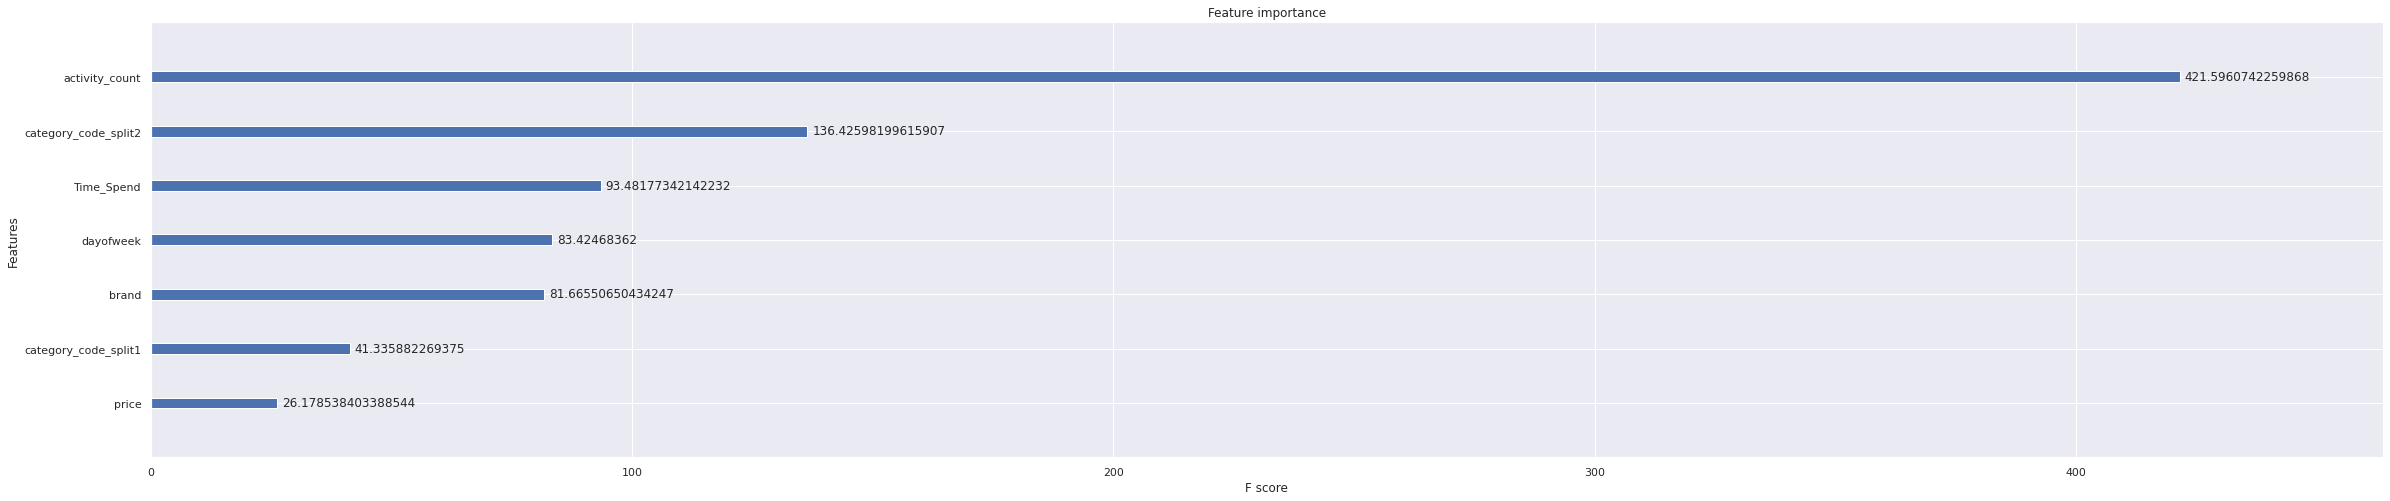

In [ ]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (30,10)
plt.show()

In [ ]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=features,label=is_purchased)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.548753,0.000802,0.548563,0.000783
1,0.588947,0.023627,0.588667,0.022441
2,0.636876,0.002712,0.636076,0.003003
3,0.643552,0.009148,0.642642,0.007190
4,0.645067,0.008024,0.643640,0.006195


In [ ]:
from sklearn.metrics import mean_squared_error
msexgboost = mean_squared_error(y_test,y_pred)
rmsexgboost= np.sqrt(msexgboost)

In [ ]:
rmsexgboost

0.5995119546517413

In [ ]:
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

In [ ]:
classes = df_capu['is_purchased'].unique()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


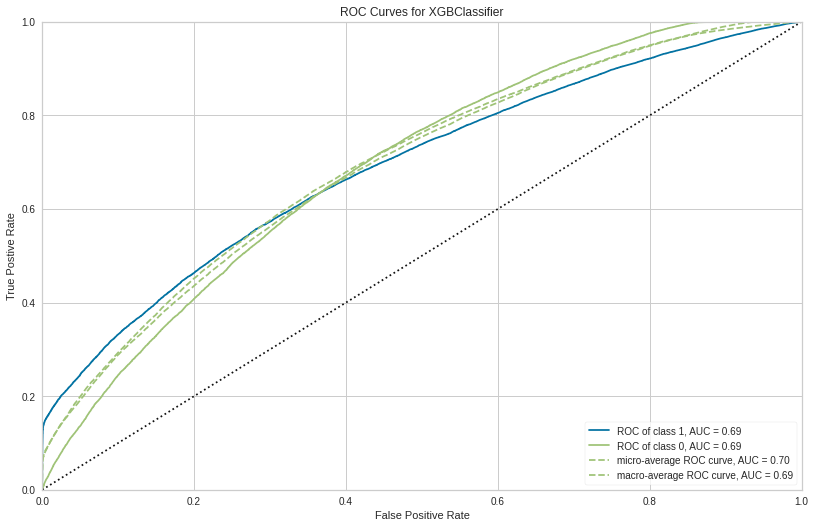

In [ ]:

from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
rocauc = ROCAUC(model, size=(980, 620), classes=classes)

rocauc.score(X_test, y_test)  
r = rocauc.poof()

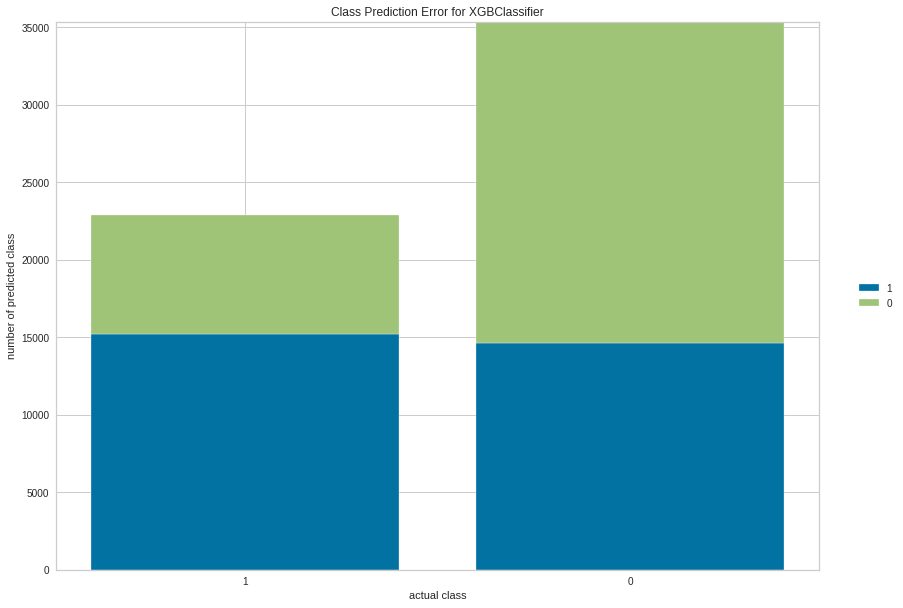

In [ ]:
error = ClassPredictionError(model, size=(1080, 620), classes=classes)

error.score(X_test, y_test)
e = error.poof()

This shows that our model is good at predicting if the purchase will happen , but its not able to predict the cases in which the puchase will not happen as shown in class 0 is not purchased

https://rebeccabilbro.github.io/xgboost-and-yellowbrick/ - code reference

Testing on a sample of data 

In [ ]:
df_sample =pd.read_csv("/content/gdrive/Shareddrives/256/Oct_data_without_categorycode_nan.csv",nrows=10000,sep=',',engine='python', skiprows=[i for i in range(1,4500000)])

In [ ]:
df_sample

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,6535770,2019-10-06 05:57:13 UTC,view,1005014,2053013555631882655,electronics.smartphone,samsung,603.36,522727964,d6230760-2fe4-49a9-b03b-b7047fda9896
1,6535771,2019-10-06 05:57:13 UTC,view,3900687,2053013552326770905,appliances.environment.water_heater,ariston,90.83,522703579,1b0fd7c6-90ec-4ecb-bc0e-eca5de1bf003
2,6535772,2019-10-06 05:57:13 UTC,purchase,1004873,2053013555631882655,electronics.smartphone,samsung,380.31,534884365,e7cdd612-f3f8-4631-b462-1265b9cc44f7
3,6535773,2019-10-06 05:57:13 UTC,view,1004249,2053013555631882655,electronics.smartphone,apple,730.26,526013319,eb60ca65-06e9-4e38-8604-ae6c0331622a
4,6535775,2019-10-06 05:57:13 UTC,view,28400552,2053013566209917945,accessories.bag,picard,90.09,516758231,e9407129-f51b-4f11-a879-34863e359a6f
...,...,...,...,...,...,...,...,...,...,...
9995,6549804,2019-10-06 06:08:45 UTC,view,28720308,2053013565069067197,apparel.shoes.keds,reebok,118.15,516758231,e9407129-f51b-4f11-a879-34863e359a6f
9996,6549805,2019-10-06 06:08:45 UTC,view,1201256,2172371436436455782,electronics.tablet,huawei,178.42,541971476,51835145-e630-4371-8a9c-419f6a175646
9997,6549806,2019-10-06 06:08:45 UTC,view,25900017,2053013563718501229,computers.components.cooler,almacom,83.12,547085759,c6a8c4f8-b547-4887-9f48-9a5007716a15
9998,6549807,2019-10-06 06:08:45 UTC,view,1004662,2053013555631882655,electronics.smartphone,samsung,1158.05,518674769,03a083ff-6c10-41a6-bffd-c0fd7efeb044


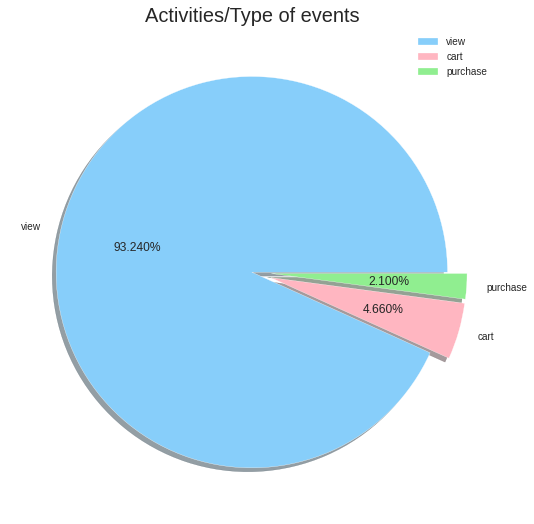

In [ ]:
lab = ['view', 'cart','purchase']
size = df_sample['event_type'].value_counts()
colors = ['lightskyblue', 'lightpink','lightgreen']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = lab, shadow = True, autopct = '%.3f%%')
plt.title('Activities/Type of events', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
df_c = df_sample[['product_id','category_id','brand' ,'category_code']]
df_sorted = df_c.sort_values(by=['product_id'], ascending=False)
df_brand_present = df_sorted.loc[df_sorted["brand"].notna()].drop_duplicates(subset=['product_id'])
df_brand_not_present = df_sorted.loc[df_sorted["brand"].isna() ].drop_duplicates(subset=['product_id'])
df_brand_not_present = df_brand_not_present.merge(df_brand_present,on='product_id',how="left")
df_brand_not_present.head(20)
df_brand_not_present['category_code_y'] = df_brand_not_present['category_code_y'].fillna(df_brand_not_present['category_code_x'])
df_brand_not_present['brand_y'] = df_brand_not_present['brand_y'].fillna(df_brand_not_present['brand_x'])
df_brand_not_present = df_brand_not_present.drop(['category_id_y' , 'category_code_x' , 'brand_x'], axis=1)
df_brand_not_present = df_brand_not_present.rename(columns={"category_id_x": "category_id" ,"category_code_y": "category_code", "brand_y": "brand"})
df_new = df_sample
df_new = df_new.merge(df_brand_not_present,on='product_id',how="left")
df_new['category_code_y'] = df_new['category_code_y'].fillna(df_new['category_code_x'])
df_new['brand_y'] = df_new['brand_y'].fillna(df_new['brand_x'])
df_new = df_new.drop(['category_code_x' , 'brand_x' , 'category_id_y'], axis=1)
df_new['DateTime'] = df_new['event_time'].astype('datetime64[ns]')
df_new =  df_new.rename(columns={"category_id_x": "category_id" ,"category_code_y": "category_code", "brand_y": "brand"})
df_new['Time'] = df_new['DateTime'].dt.time
df_new['Date'] = df_new['DateTime'].dt.date
df_capu = df_new.loc[df_new["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_capu["is_purchased"] = np.where(df_capu["event_type"]=="purchase",1,0)
df_capu["is_purchased"] = df_capu.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_capu = df_capu.loc[df_capu["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_capu['dayofweek'] = df_capu['DateTime'].apply(lambda s: str(datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_capu.dropna(how='any', inplace=True)
df_capu["category_code_split1"] = df_capu["category_code"].str.split(".",expand=True)[0].astype('category')
df_capu["category_code_split2"] = df_capu["category_code"].str.split(".",expand=True)[1].astype('category')
purchaseandcart = df_new.loc[df_new["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
purchaseandcart.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df_test.loc[df_test['user_id'].isin(purchaseandcart['user_id'])]
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})
df_capu = df_capu.merge(activity_in_session, on='user_session', how='left')
df_capu['activity_count'] = df_capu['activity_count'].fillna(0)
df_capu['activity_count'] = df_capu['activity_count'].fillna(0)
cart_purchase_users_all_activity_time_spend = df_new.loc[df_new['user_id'].isin(purchaseandcart['user_id'])]
activity_in_session_time_spent = cart_purchase_users_all_activity_time_spend.groupby(['user_session']).agg({'DateTime': [np.min, np.max]})
activity_in_session_time_spent = activity_in_session_time_spent.xs('DateTime', axis=1, drop_level=True).reset_index()
activity_in_session_time_spent['amax'] = activity_in_session_time_spent['amax'].apply(lambda x: pd.Timestamp(x))
activity_in_session_time_spent['amin'] = activity_in_session_time_spent['amin'].apply(lambda x: pd.Timestamp(x))
activity_in_session_time_spent['Time_Spend'] = activity_in_session_time_spent['amax'] - activity_in_session_time_spent['amin']
df_capu = df_capu.merge(activity_in_session_time_spent, on='user_session', how='left')

In [ ]:
df_capu


,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date,is_purchased,dayofweek,category_code_split1,category_code_split2,activity_count,amin,amax,Time_Spend
0,6535778,2019-10-06 05:57:14 UTC,cart,1002544,2053013555631882655,462.39,554513471,3e86be1b-9bae-4858-a7f1-b789e73369b7,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:14,2019-10-06 06:02:26,0 days 00:05:12
1,6535784,2019-10-06 05:57:14 UTC,cart,1003310,2053013555631882655,696.29,516580765,6ceabec1-9187-4cb1-8c54-c12340b24e55,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,0,6,electronics,smartphone,19.0,2019-10-06 05:57:14,2019-10-06 06:04:33,0 days 00:07:19
2,6535815,2019-10-06 05:57:16 UTC,cart,4804056,2053013554658804075,161.78,554191789,7c7315ad-4b85-4c0d-9032-e74871c93a77,apple,electronics.audio.headphone,2019-10-06 05:57:16,05:57:16,2019-10-06,1,6,electronics,audio,5.0,2019-10-06 05:57:16,2019-10-06 05:59:53,0 days 00:02:37
3,6535845,2019-10-06 05:57:17 UTC,cart,1002547,2053013555631882655,460.72,525188457,3a18160f-3887-4ff3-bca6-2671ea9f1647,apple,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:17,2019-10-06 05:59:15,0 days 00:01:58
4,6535847,2019-10-06 05:57:17 UTC,cart,1004781,2053013555631882655,272.34,512424976,734275cb-cc54-456e-9845-45a1cf99ec67,huawei,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,0,6,electronics,smartphone,9.0,2019-10-06 05:57:17,2019-10-06 05:58:19,0 days 00:01:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,6549552,2019-10-06 06:08:34 UTC,cart,4804055,2053013554658804075,192.53,512588541,cca8c90b-5260-4bef-8c8d-34d04287c581,apple,electronics.audio.headphone,2019-10-06 06:08:34,06:08:34,2019-10-06,0,6,electronics,audio,0.0,2019-10-06 06:08:15,2019-10-06 06:08:34,0 days 00:00:19
292,6549621,2019-10-06 06:08:37 UTC,cart,1500447,2053013552955916539,136.17,514604492,5981c1b8-9e14-45ef-b616-b6ff6a398846,hp,computers.peripherals.printer,2019-10-06 06:08:37,06:08:37,2019-10-06,0,6,computers,peripherals,0.0,2019-10-06 05:57:14,2019-10-06 06:08:44,0 days 00:11:30
293,6549664,2019-10-06 06:08:38 UTC,cart,1004210,2053013555631882655,89.84,519457561,f967bb59-e412-4bac-a295-92e8ba83a7d5,samsung,electronics.smartphone,2019-10-06 06:08:38,06:08:38,2019-10-06,0,6,electronics,smartphone,0.0,2019-10-06 06:08:32,2019-10-06 06:08:38,0 days 00:00:06
294,6549687,2019-10-06 06:08:40 UTC,cart,1004856,2053013555631882655,131.77,557213639,da47ab2b-2dcb-463a-8c59-836110753607,samsung,electronics.smartphone,2019-10-06 06:08:40,06:08:40,2019-10-06,0,6,electronics,smartphone,0.0,2019-10-06 06:07:38,2019-10-06 06:08:40,0 days 00:01:02


This is the test data from which we can choose any set of records or record to make a prediction case 

In [ ]:
df_capu.user_id.value_counts()

519457561    3
545704653    3
516222100    3
514452643    3
513200447    2
            ..
512588541    1
557249347    1
517520193    1
553538877    1
514742272    1
Name: user_id, Length: 265, dtype: int64

This is the user ids with the number of times they occured in the dataframe, so lets choose all the records for the user 514452643 and check the prediction 

In [ ]:
df_testing_label = df_capu[['brand', 'price', 'dayofweek' , 'category_code_split1', 'category_code_split2','activity_count','Time_Spend']]
df_testing_label.loc[:,'brand'] = LabelEncoder().fit_transform(df_testing_label.loc[:,'brand'].copy())
df_testing_label.loc[:,'dayofweek'] = LabelEncoder().fit_transform(df_testing_label.loc[:,'dayofweek'].copy())
df_testing_label.loc[:,'category_code_split1'] = LabelEncoder().fit_transform(df_testing_label.loc[:,'category_code_split1'].copy())
df_testing_label.loc[:,'category_code_split2'] = LabelEncoder().fit_transform(df_testing_label.loc[:,'category_code_split2'].copy())
df_testing_label.loc[:,'Time_Spend'] = LabelEncoder().fit_transform(df_testing_label.loc[:,'Time_Spend'].copy())

df_testing_label

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,brand,price,dayofweek,category_code_split1,category_code_split2,activity_count,Time_Spend
0,2,462.39,0,4,11,1.0,143
1,2,696.29,0,4,11,19.0,168
2,2,161.78,0,4,1,5.0,85
3,2,460.72,0,4,11,1.0,67
4,12,272.34,0,4,11,9.0,42
...,...,...,...,...,...,...,...
291,2,192.53,0,4,1,0.0,15
292,11,136.17,0,3,9,0.0,206
293,32,89.84,0,4,11,0.0,4
294,32,131.77,0,4,11,0.0,42


In [ ]:

y_pred = model.predict(df_testing_label.head())
y_pred

array([0, 0, 1, 0, 0])

In [ ]:
df_testing_label.head()

,brand,price,dayofweek,category_code_split1,category_code_split2,activity_count,Time_Spend
0,2,462.39,0,4,11,1.0,143
1,2,696.29,0,4,11,19.0,168
2,2,161.78,0,4,1,5.0,85
3,2,460.72,0,4,11,1.0,67
4,12,272.34,0,4,11,9.0,42


In [ ]:
df_capu.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date,is_purchased,dayofweek,category_code_split1,category_code_split2,activity_count,amin,amax,Time_Spend
0,6535778,2019-10-06 05:57:14 UTC,cart,1002544,2053013555631882655,462.39,554513471,3e86be1b-9bae-4858-a7f1-b789e73369b7,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:14,2019-10-06 06:02:26,0 days 00:05:12
1,6535784,2019-10-06 05:57:14 UTC,cart,1003310,2053013555631882655,696.29,516580765,6ceabec1-9187-4cb1-8c54-c12340b24e55,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,0,6,electronics,smartphone,19.0,2019-10-06 05:57:14,2019-10-06 06:04:33,0 days 00:07:19
2,6535815,2019-10-06 05:57:16 UTC,cart,4804056,2053013554658804075,161.78,554191789,7c7315ad-4b85-4c0d-9032-e74871c93a77,apple,electronics.audio.headphone,2019-10-06 05:57:16,05:57:16,2019-10-06,1,6,electronics,audio,5.0,2019-10-06 05:57:16,2019-10-06 05:59:53,0 days 00:02:37
3,6535845,2019-10-06 05:57:17 UTC,cart,1002547,2053013555631882655,460.72,525188457,3a18160f-3887-4ff3-bca6-2671ea9f1647,apple,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:17,2019-10-06 05:59:15,0 days 00:01:58
4,6535847,2019-10-06 05:57:17 UTC,cart,1004781,2053013555631882655,272.34,512424976,734275cb-cc54-456e-9845-45a1cf99ec67,huawei,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,0,6,electronics,smartphone,9.0,2019-10-06 05:57:17,2019-10-06 05:58:19,0 days 00:01:02


In [ ]:

y_pred_svc = model.predict(df_testing_label)
y_pred_svc

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

These below steps are the file pickling steps which is done using 

In [ ]:
from sklearn.externals import joblib 
import pickle
import os

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pip install sklearn

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:


import sklearn
#sklearn.__version__
from sklearn.externals import joblib 
import pickle
import os
# Save the model as a pickle in a file 

path_to_dataset = '/content/gdrive/Shareddrives/256/research papers' 

path_to_xgb = os.path.join(path_to_dataset, 'saved_model_xg.pkl')
path_to_svm = os.path.join(path_to_dataset, 'saved_model_svm.pkl')


In [ ]:
joblib.dump(model, path_to_xgb)
joblib.dump(clf, path_to_svm)


['/content/gdrive/Shareddrives/256/research papers/saved_model_svm.pkl']

In [ ]:
xgb_from_joblib = joblib.load(path_to_xgb) 
svm_from_joblib = joblib.load(path_to_svm)

In [ ]:
xgb_from_joblib.predict(df_testing_label)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm_from_joblib.predict(df_testing_label)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
import pickle 
path_to_xgb_p = os.path.join(path_to_dataset, 'saved_model_pickle_xg.pkl')
inputfile = open(path_to_xgb_p,"wb")
saved_model_xg = pickle.dump(model ,inputfile) 

In [ ]:
inputfile = open(path_to_xgb_p,"rb")
xg_from_pickle = pickle.load(inputfile)

In [ ]:
xg_from_pickle.predict(df_testing_label.head())

array([0, 0, 1, 0, 0])

In [ ]:
import pickle 
path_to_svm_p = os.path.join(path_to_dataset, 'saved_model_pickle_svm.pkl')
inputfile_svm = open(path_to_svm_p,"wb")
saved_model_svm = pickle.dump(clf ,inputfile_svm) 

In [ ]:
inputfile = open(path_to_svm_p,"rb")
load_pickle_model_svm = pickle.load(inputfile)

In [ ]:
load_pickle_model_svm.predict(df_testing_label.head())

array([1, 1, 0, 1, 0])

In [ ]:
df_capu.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,category_code,DateTime,Time,Date,is_purchased,dayofweek,category_code_split1,category_code_split2,activity_count,amin,amax,Time_Spend
0,6535778,2019-10-06 05:57:14 UTC,cart,1002544,2053013555631882655,462.39,554513471,3e86be1b-9bae-4858-a7f1-b789e73369b7,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:14,2019-10-06 06:02:26,0 days 00:05:12
1,6535784,2019-10-06 05:57:14 UTC,cart,1003310,2053013555631882655,696.29,516580765,6ceabec1-9187-4cb1-8c54-c12340b24e55,apple,electronics.smartphone,2019-10-06 05:57:14,05:57:14,2019-10-06,0,6,electronics,smartphone,19.0,2019-10-06 05:57:14,2019-10-06 06:04:33,0 days 00:07:19
2,6535815,2019-10-06 05:57:16 UTC,cart,4804056,2053013554658804075,161.78,554191789,7c7315ad-4b85-4c0d-9032-e74871c93a77,apple,electronics.audio.headphone,2019-10-06 05:57:16,05:57:16,2019-10-06,1,6,electronics,audio,5.0,2019-10-06 05:57:16,2019-10-06 05:59:53,0 days 00:02:37
3,6535845,2019-10-06 05:57:17 UTC,cart,1002547,2053013555631882655,460.72,525188457,3a18160f-3887-4ff3-bca6-2671ea9f1647,apple,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,1,6,electronics,smartphone,1.0,2019-10-06 05:57:17,2019-10-06 05:59:15,0 days 00:01:58
4,6535847,2019-10-06 05:57:17 UTC,cart,1004781,2053013555631882655,272.34,512424976,734275cb-cc54-456e-9845-45a1cf99ec67,huawei,electronics.smartphone,2019-10-06 05:57:17,05:57:17,2019-10-06,0,6,electronics,smartphone,9.0,2019-10-06 05:57:17,2019-10-06 05:58:19,0 days 00:01:02


In [ ]:
df_testing_label.head()

,brand,price,dayofweek,category_code_split1,category_code_split2,activity_count,Time_Spend
0,2,462.39,0,4,11,1.0,143
1,2,696.29,0,4,11,19.0,168
2,2,161.78,0,4,1,5.0,85
3,2,460.72,0,4,11,1.0,67
4,12,272.34,0,4,11,9.0,42
